### **案例**
💡**以汽车引擎的马力和峰值转速为特征量，预测其在城市路况中的每公里所耗油量加仑数**

In [100]:
import numpy as np
from numpy import genfromtxt
data = genfromtxt('datasets/automobile/imports-85.csv', delimiter=',')

# 使用布尔索引过滤 NaN 值
mask = ~np.isnan(data[:, 21]) & ~np.isnan(data[:, 22]) & ~np.isnan(data[:, 23])

data = np.array([data[mask, 21], data[mask, 22], data[mask, 23]])
print(data.shape)

(3, 203)


In [103]:
from sklearn.model_selection import train_test_split

x_data = data[:-1].T
y_data = data[-1]
print(x_data.shape, y_data.shape)
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

(203, 2) (203,)


In [104]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

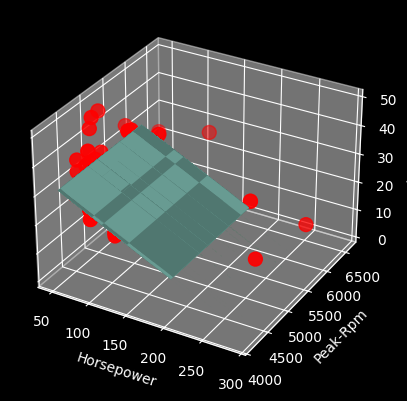

In [108]:
import matplotlib.pylab as plt

ax = plt.figure().add_subplot(111, projection='3d')
ax.scatter(x_data[:, 0], x_data[:, 1], y_data, c='r', marker='o', s=100)
x0 = x_data[:, 0]
x1 = x_data[:, 1]
x0, x1 = np.meshgrid(x0, x1)
z = model.intercept_ + x0 * model.coef_[0] + x1 * model.coef_[1]
ax.plot_surface(x0, x1, z)
ax.set_xlabel('Horsepower')
ax.set_ylabel('Peak-Rpm')
ax.set_zlabel('City MPG')
plt.show()